In [1]:
%pylab inline
import requests
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


In [2]:
import seaborn as s
from matplotlib.colors import LogNorm
s.set(rc={'image.cmap': "jet"})
rcParams['savefig.dpi'] = 100
figsize(12,10)
rcParams['figure.facecolor'] = (1,1,1,1)
rcParams['savefig.facecolor'] = (1,1,1,1)

# Data is taken from the cosmic rays database

In [3]:
# This does the parsing
def request_and_parse(url):
    import warnings; warnings.filterwarnings('ignore')
    data = requests.get(url)
    cols, frame = [], []
    for l in data.text.splitlines():
        if l[0] == '#': 
            if not 'Col' in l: continue
            cols.append(' '.join(l.split()[3:]))
            continue
        frame.append(l.split())
    frame = pd.DataFrame(frame, columns=cols)
    frame.iloc[:,3:11] = frame.iloc[:,3:11].astype(float)
    return frame

# Deuteron fraction

(0, 0.1)

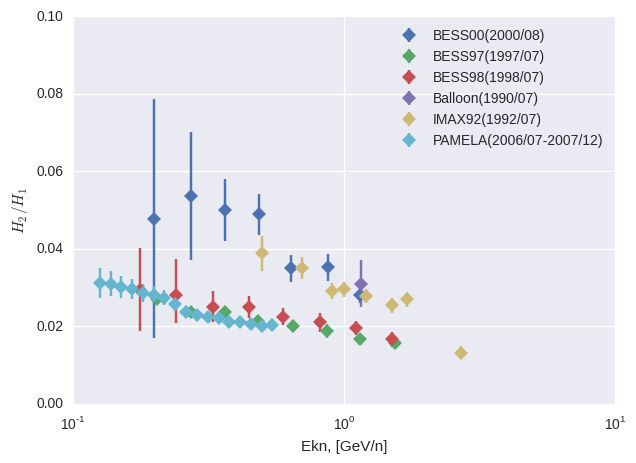

In [4]:
frame = request_and_parse("https://lpsc.in2p3.fr/cosmic-rays-db/_dialog_result.php?num=2H&den=1H&energy_type=EKN")

# Plotting
def doplt(frame):
    nerr = frame.iloc[:,[7, 9]].sum(axis=1)
    perr = frame.iloc[:,[8,10]].sum(axis=1)
    errorbar(frame.iloc[:,3],frame.iloc[:,6], yerr=[-nerr, perr], fmt='D', label=frame.name)
    return frame

ix = frame.iloc[:,1].unique()[[9,1,2,6,7,8]]

figsize(7,5)
frame[frame.iloc[:,1].isin(ix)].groupby(frame.columns[1]).apply(doplt);
legend()
xscale('log')
xlabel("Ekn, [GeV/n]")
ylabel("$H_2/H_1$")
ylim(0,0.1)

# Deuteron flux

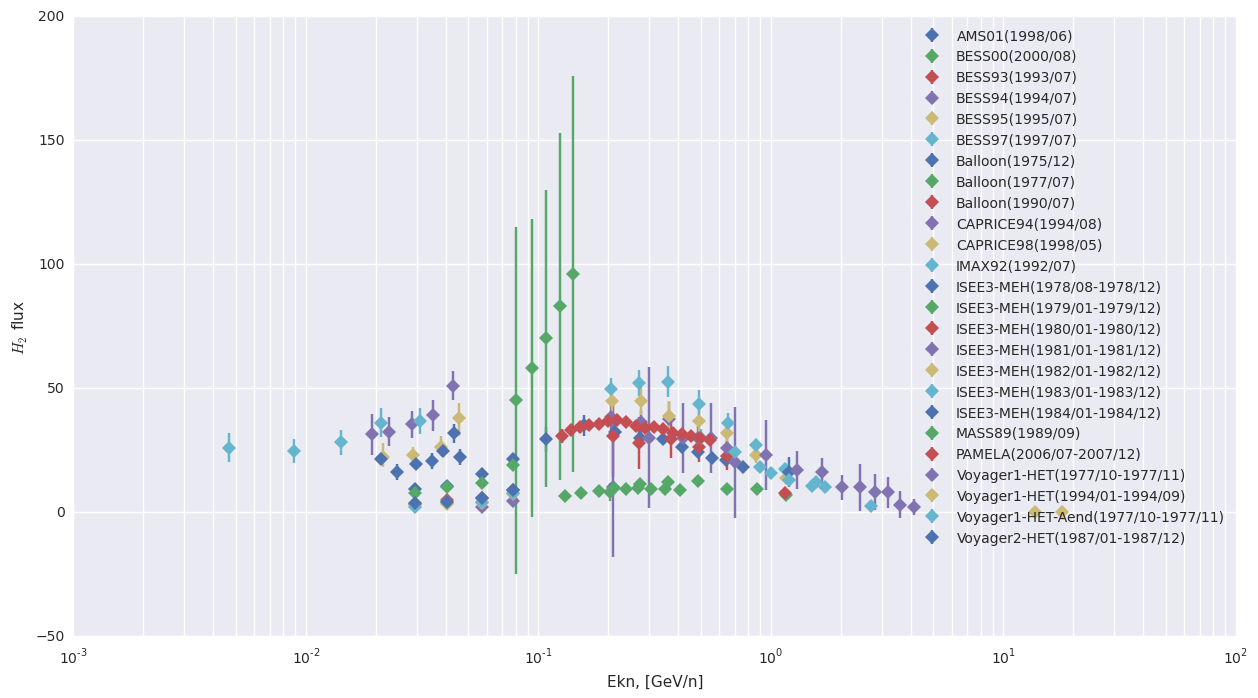

In [28]:
frame = request_and_parse("https://lpsc.in2p3.fr/cosmic-rays-db/_dialog_result.php?num=2H&energy_type=EKN")

# Plotting
def doplt(frame):
    nerr = frame.iloc[:,[7, 9]].sum(axis=1)
    perr = frame.iloc[:,[8,10]].sum(axis=1)
    errorbar(frame.iloc[:,3],frame.iloc[:,6], yerr=[-nerr, perr], fmt='D', label=frame.name)
    return frame

ix = frame.iloc[:,1].unique()#[[9,1,2,6,7,8]]

figsize(15,8)
frame[frame.iloc[:,1].isin(ix)].groupby(frame.columns[1]).apply(doplt);
legend()
xscale('log')
xlabel("Ekn, [GeV/n]")
ylabel("$H_2$ flux")
